### Custom Creation of Sensor-Mover Networks

This tutorial will illustrate the various fields one can tune when creating a Sensor-Mover Network. Creating a network is fairly straightforward, however the caviat is that there are many parameters that can be tuned. This tutorial will illustrate how to tune them. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, randint, poisson, uniform
import pyBrainNetSim.models.network as nwk
import pyBrainNetSim.generators.random as rnd
from pyBrainNetSim.drawing.viewers import draw_networkx

#### Default Network - Why a Random Network?

The default settings are such that the parameters are generally distributed, meaning that upon creation of a new Sensor-Mover each parameter is sampled from a probability distribution. For example, the variability in the number of internal neurons can be described by a discrete uniform distribution between 11 and 20 neurons, meaning that when creating the Sensor-Mover there is an equal probability (10%) of having any number of neurons between 11 and 20. This concept is repeated with the other properties

The reason this randomness is built in is because it allows for a variety in the configurations of networks without having to explicitely define them. The product of this approach leads to a wide variation in the ultimate performance of each Sensor-Mover (i.e. the ability to directionally sense and subsequently move towards the food). Finding the "best" performers via evolutionary simulation is one of the driving ideas behind this project. 

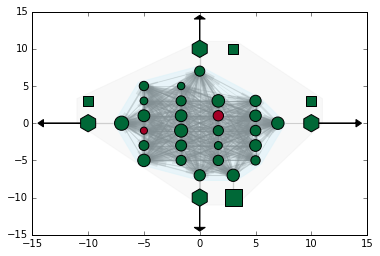

In [2]:
sm_prop_dist = rnd.SensorMoverPropertyDistribution()  # default set of distributions of the different variables in the mouse
net = nwk.NeuralNetData(sm_prop_dist.create_digraph())
ax = draw_networkx(net)

#### A Little Customization - Set Number of Neurons

Below will illustrate the basic way to start customizing how networks are created.

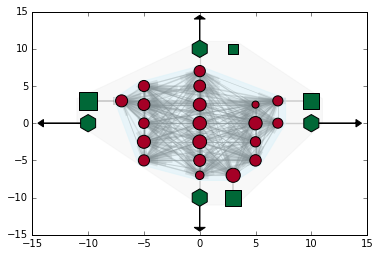

In [3]:
internal_props = {'number_neurons': 20, 'excitatory_to_inhibitory':.1, 'spontaneity': 0.05, 'inactive_period': 1.}
ipd = rnd.InternalPropertyDistribution(**internal_props)
sm_prop_dist = rnd.SensorMoverPropertyDistribution(internal=ipd)
net = nwk.NeuralNetData(sm_prop_dist.create_digraph())
ax1 = draw_networkx(net)

Here the network properties are fixed, meaning every Sensor-Mover created will have 20 internal neurons, 10% excitatory (green circles) and fixed dynamic properties like a 5% spontaneous firing rate and a 1-period inactive after firing.

#### A Little More Customization - Set New Distribution for the Number of Neurons

As descussed earlier, the default network creation relies on probability distributions to create networks. Below this will be extended to to incorporate custom probability distributions.

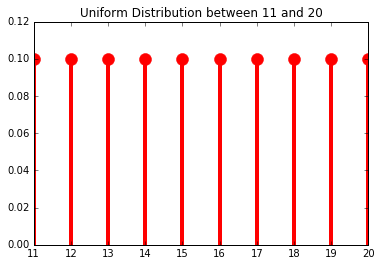

In [4]:
internal_props = {'number_neurons': randint(low=11, high=21),}  # 'randint' is a discrete uniform distribution between 11 and 20 neurons.
x = range(11,21,1)
ax1 = plt.plot(x, internal_props['number_neurons'].pmf(x),'ro', ms=12, mec='r')
ax1 = plt.vlines(x, 0, internal_props['number_neurons'].pmf(x), colors='r', lw=4)
ax1 =plt.title('Uniform Distribution between 11 and 20')

This plot shows the probability of choosing any number of neurons between 11 and 20. For this uniform distribution the probability of choosing any one of these numbers is 10%. To be 

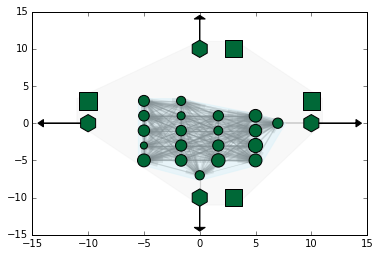

In [5]:
ipd = rnd.InternalPropertyDistribution(**internal_props)
sm_prop_dist = rnd.SensorMoverPropertyDistribution(internal=ipd)
net = nwk.NeuralNetData(sm_prop_dist.create_digraph())
ax1 = draw_networkx(net)